In [212]:
import numpy as np
import pandas as pd
import os
import matplotlib.ticker as mticker
import datetime as dt


In [2]:
path = os.getcwd()+'\\DATA'

files = []
filespath = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.xls' in file:
            files.append(file)
            filespath.append(os.path.join(r, file))

In [3]:
#xls = pd.read_excel('C:\\Users\\fpe\\--JUPYTER--\\3384_CPTu\\DATA\840-3.xls', 'Data')

In [4]:
# e=0
# for file in files:
#     xlstemp = pd.read_excel(os.path.join(r, file), 'Data')
#     xlstemp['CPTname']=file.replace('.xls','')
#     e+=1
#     if e==1:
#         xls=xlstemp.copy()
#     if e>1:
#         xls.append(xlstemp, ignore_index = True, sort=True)
                

    

In [5]:
xls=pd.DataFrame({})
for file in files:
    xlstemp = pd.read_excel(os.path.join(r, file), 'Data')
    xlstemp['CPTname']=file.replace('.xls','')
    xls = xls.append(xlstemp, ignore_index = True, sort=True)

In [6]:
xls

,CPTname,Cone resistance (qc) in MPa,Corrected cone resistance (qt) in MPa,Depth [m],Dynamic pore pressure (u2) in MPa,Dynamic pore pressure ratio (u/qc) in MPa,Effective cone resistance (qe) in MPa,Effective vertical stress (rov;z`) in kPa,Equilibirum pore pressure (u0) in MPa,Equivalent SPT N60 Value,...,Sleeve friction (fs) in MPa,Soil Classification (avg. of Fr and Bq),Soil Classification (using Bq),Soil Classification (using Fr),Soil behaviour type index (Ic),Sounding speed in cm/s,Total force hydr (Qt) in kN,Total force mech (Qt) in kN,Total friction (Qst) in kN,Total vertical stress (rov;z) in kPa
0,1040,-0.0004,-0.0004,0.000000,0.0000,0.0000,-0.0004,0.21,0.0000,-0.0035,...,0.0,0.0,0.0,0.0,4.0,0.1000,11.3560,NaN,11.3564,0.21
1,1040,0.4913,0.4913,0.010000,0.0002,0.0003,0.4911,0.32,0.0001,4.4312,...,0.0,0.0,0.0,0.0,4.0,1.2048,5.7915,NaN,5.3002,0.42
2,1040,0.6268,0.6268,0.020000,0.0003,0.0005,0.6265,0.43,0.0002,5.6534,...,0.0,0.0,0.0,0.0,4.0,2.0833,6.5802,NaN,5.9534,0.63
3,1040,5.3926,5.3927,0.030000,0.0007,0.0001,5.3919,0.54,0.0003,48.6388,...,0.0,0.0,0.0,0.0,4.0,2.0000,10.1999,NaN,4.8073,0.84
4,1040,7.4444,7.4447,0.040000,0.0011,0.0002,7.4433,0.65,0.0004,67.1460,...,0.0,0.0,0.0,0.0,4.0,2.0833,12.4797,NaN,5.0353,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41310,840-3,3.8328,3.8327,3.239997,-0.0001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.5235,NaN,17.6907,NaN
41311,840-3,11.0482,11.0483,3.249997,0.0009,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.5349,NaN,19.4867,NaN
41312,840-3,14.2852,14.2854,3.259997,0.0014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9622,NaN,15.6770,NaN
41313,840-3,15.2023,15.2025,3.269997,0.0013,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.6802,NaN,16.4779,NaN


In [16]:
groupedCPT=xls.groupby('CPTname').mean()

In [61]:
groupedCPT.index.sort

<bound method Index.sort of Index(['1040', '1060', '1080', '1100', '1120', '1140', '1160', '1180', '1200',
       '1220', '1240', '1260', '1280', '1300', '1320', '1340', '1360', '1380',
       '1400', '1420', '1440', '1440A', '1460', '1480', '1500', '1520', '1540',
       '1560', '1580', '1600', '1620', '1640', '1660', '1680', '1700', '1720',
       '1740', '1760', '1780', '1800', '1820 (0)', '20', '40', '60', '680-1',
       '680-2', '700-1', '700-2', '700-3', '720-1', '720-2', '720-3', '740-1',
       '740-2', '740-3', '760-1', '760-2', '760-3', '780-1', '780-2', '780-3',
       '800-1', '800-2', '800-3', '820-1', '820-2', '820-3', '840-1', '840-2',
       '840-3'],
      dtype='object', name='CPTname')>

In [19]:
str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + "groupedCPT.csv"
export_csv = groupedCPT.to_csv (nomefile, header=True, sep=';')

In [55]:
descr_tab=xls.describe().iloc[:,:7]

In [57]:


namefile = 'descr_tab.xls'

str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + namefile
export_csv = descr_tab.to_excel (nomefile, header=True)

In [20]:
def _l1(x):
    y=12.333*np.exp(-1.466*x)
    return y
def _l4(x):
    y=3.4258*np.exp(0.4778*x)
    return y
def _l5(x):
    y=7.3998*np.exp(0.6904*x)
    return y
def _l6(x):
    y=24.936*np.exp(0.9057*x)
    return y
def _l7(x):
    y=124.51*np.exp(1.9798*x)
    return y
def _l8(x):
    y=2033.1*np.power(x,-2.203)
    return y
def _l9(x):
    y=213.3*np.power(x,-0.589)
    return y
def _l89(x):
    y=0.01*np.exp(2.3026*x)
    return y

coeffma = 2.297409
coeffmm  = 1.969584
coeffmb = 1.709249


def _coeffm(x,y):   ## nota y input must be in kPa
    
    y=y/100  # from kPa -> bar
    x=x*100  # in %
    
    grad = np.degrees(np.arctan(np.log10(y/0.3556)/np.log10(10.149/x)))
    
    if grad>90:grad=90
    if grad<0: grad=0
    
    coeff = grad/np.degrees(np.arctan(coeffmm))
    
    return coeff


def _dr(qc,sv):
    
    # valid for qc,sv in kPa

    dre = 100*(0.268*np.log(qc/np.sqrt(sv*100))-0.675)
              
    if dre>100 : dre=100
    if dre<0 : dre=0
        
    return dre



def _classe(x,y):   ## nota y input must be in kPa
       
    classe=0
    
    y=y/100  # from kPa -> bar
    x=x*100  # in %
    
    if (y>0.001)&(y<_l1(x)):classe=1
    if (y>_l1(x))&(y<_l4(x))&(y<_l9(x)):classe=23
    if (y>_l4(x))&(y>_l1(x))&(y<_l5(x))&(y<_l9(x)):classe=4
    if (y>_l1(x))&(y>_l5(x))&(y<_l6(x))&(y<_l8(x)):classe=5
    if (y>_l1(x))&(y>_l6(x))&(y<_l7(x))&(y<_l8(x)):classe=6
    if (x>0.1)&(x<1.04)&(y>_l7(x)):classe=7
    if (y>_l8(x))&(y>_l89(x)):classe=8
    if (y>_l9(x))&(x>4)&(classe!=8):classe=9

    return int(classe)

In [23]:
####        INPUT DATA   ########################

density = 19 # in kPa

#################################################


df=pd.DataFrame({})
df['depth_m']=xls[[col for col in xls.columns if ('Depth' in col)][0]]                                                        
df['qc_kPa']=xls[[col for col in xls.columns if ('qc' in col)][0]]*1000
df['fs_kPa']=xls[[col for col in xls.columns if ('fs' in col)][0]]*1000

df['sv_kPa']=df.depth_m*density
df['qc_norm'] = df.qc_kPa-df.sv_kPa

df=df[(df > 0)]  ## escludi qualsiasi valore negativo

df['Q']=(df.qc_norm)              ### I need to plot qc/pa
df['F']=df.fs_kPa/(df.qc_norm)

df.dropna(how="any",inplace=True)

df=df[((df.qc_kPa!=0)&(df.fs_kPa!=0)&(df.Q!=0)&(df.F!=0))]


df=df.dropna(how="any")   ## elimina i nan
df[(df != 0)]             ## escludi qualsiasi valore uguale a 0
df=df[(df > 0)]           ## escludi qualsiasi valore negativo

# Applico le funzioni per travare le classi, consratio
df['type'] = df.apply(lambda x: _classe(x.F,x.Q), axis=1)
df['consratio'] = df.apply(lambda x: _coeffm(x.F,x.Q), axis=1)


#df[(df != 0)]              ## escludi qualsiasi valore uguale a 0
df=df[(df > 0)]             ## escludi qualsiasi valore negativo
df=df.dropna(how="any")     ## elimina i nan

df['type'] = df['type'].astype(int)

#df =df.iloc[:500,:]    ## riduco per trovare dove è l'errore


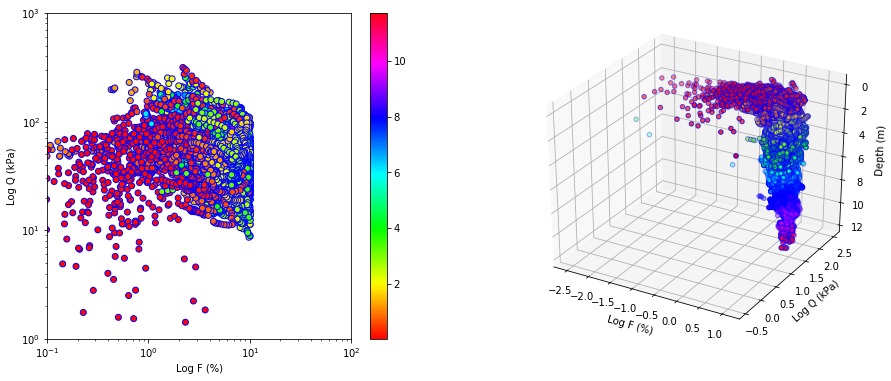

In [24]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

xs=df.F*100   ### express in %
ys=df.Q/100   ### express in bar 
zs=df.depth_m

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(zs)

ax.scatter(np.log10(xs), np.log10(ys), zs, c=cm.hsv(zs/max(zs)), marker='o', edgecolors='b')
ax2.scatter(xs, ys,c=cm.hsv(zs/max(zs)), marker='o', edgecolors='b')

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax.invert_zaxis()
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)')

cb = fig.colorbar(colmap)

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,100))

plt.show()

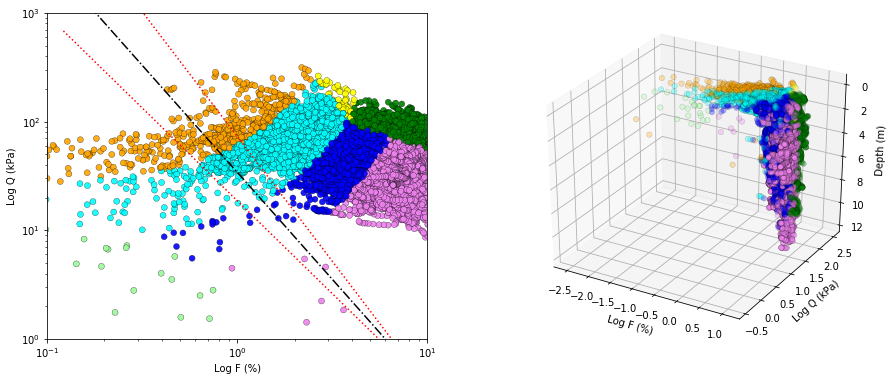

In [25]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

xs=df.F*100   ### express in %
ys=df.Q/100   ### express in bar 
zs=df.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}
df['colors'] = df['type'].map(lambda x: color_dict[x])

ax.scatter(np.log10(xs), np.log10(ys), zs, color=df['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)
ax2.scatter(xs, ys,color=df['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
#   volendo aggiungi edgecolors='b'   al grafico

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)') 

x3 = [10.149,0.32]
x4 = [10.149,0.18]
x5 = [10.149,0.12]
y3 = [0.3556,1000]
y4 = [0.3556,1000]
y5 = [0.3556,700]

ax2.plot(x3,y3,':r')
ax2.plot(x4,y4,'-.k')
ax2.plot(x5,y5,':r')

ax.invert_zaxis()

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,10))

plt.show()

In [70]:
df.tail(3)

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors
41305,3.189997,3356.6,75.9,60.609943,3295.990057,3295.990057,0.023028,4,1.139265,Blue
41306,3.199997,3391.4,78.9,60.799943,3330.600057,3330.600057,0.023689,4,1.145012,Blue
41307,3.209997,3449.5,64.0,60.989943,3388.510057,3388.510057,0.018887,5,1.105644,Cyan


In [130]:
def _constype(x):
    
    x1='normal'
    
    if x < 0.92: x1='under'
    if x > 1.10: x1='over'
    
    return x1

df['constype'] = df.consratio.map( lambda x: _constype(x))
df['constype'] = df['constype'].astype('category')
df.groupby("Category")['Score'].describe().reset_index()

# del df['constype1']

df.head()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,constype
5,0.05,7467.7,22.1,0.95,7466.75,7466.75,0.002960,6,0.896161,Orange,under
6,0.06,7971.0,44.2,1.14,7969.86,7969.86,0.005546,6,0.979036,Orange,normal
7,0.07,7448.3,88.4,1.33,7446.97,7446.97,0.011871,6,1.079913,Orange,normal
8,0.08,7517.5,98.3,1.52,7515.98,7515.98,0.013079,5,1.094711,Cyan,normal
9,0.09,7586.7,100.8,1.71,7584.99,7584.99,0.013289,5,1.097591,Cyan,normal


In [138]:
df.groupby('constype')[['depth_m','qc_kPa','fs_kPa']].describe()

depth_m                                                          \
            count      mean       std   min       25%       50%       75%   
constype                                                                    
normal      671.0  0.407466  0.604847  0.04  0.110000  0.180000  0.590000   
over      38623.0  3.342086  2.264444  0.06  1.569999  2.989998  4.630011   
under       239.0  0.235900  0.624577  0.02  0.050000  0.070000  0.110000   

                      qc_kPa               ...                     fs_kPa  \
                max    count         mean  ...      75%      max    count   
constype                                   ...                              
normal     6.080044    671.0  5876.715946  ...  6941.55  28463.7    671.0   
over      11.730170  38623.0  4631.671349  ...  5400.80  31445.7  38623.0   
under      6.080044    239.0  3194.707531  ...  4785.20   7742.9    239.0   

                                                                       
                mean         std   min     25%    50%     75%     max  
constype                                                               
normal     58.753800   25.642233  12.3   39.50   55.9   73.50   218.4  
over      260.348564  119.167601  39.6  173.30  243.0  321.85  1094.0  
under       9.647280    6.517383   0.1    4.25    8.5   15.10    26.4  

[3 rows x 24 columns]

In [211]:
df['constype'] = df['constype'].astype('category')
df['constype'] = pd.Categorical(df['constype'], categories=["normal", "under", "over"], ordered=True)
grco=df.groupby("constype")['constype'].describe().reset_index()[['constype','count']]
dfgrco = pd.DataFrame(grco)
dfgrco['count'].astype('int')
dfgrco['percent']=dfgrco['count']/dfgrco['count'].sum()
dfgrco

,constype,count,percent
0,normal,671,0.0169732
1,under,239,0.00604558
2,over,38623,0.976981


In [213]:
#########   EXPORT TABLE

namefile = 'count-cons-type.xls'

str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + namefile
export_csv = dfgrco.to_excel (nomefile, header=True)         #<----- inserire nome df corretto

In [27]:
import pandas as pd, numpy as np, random
import matplotlib.pyplot as plt, matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import IPython.display as IPdisplay
import glob
from PIL import Image as PIL_Image
from images2gif import writeGif
import pynamical
from pynamical import simulate, phase_diagram_3d
import pynamical
from pynamical import simulate, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, random, glob, os, IPython.display as IPdisplay
from PIL import Image
%matplotlib inline
import os

In [ ]:
# set a filename, run the logistic model, and create the plot

save_folder = 'images/phase-animate_3'
gif_filename = '03-pan-rotate-zoom-demo'

working_folder = '{}/{}'.format(save_folder, gif_filename)

if not os.path.exists(working_folder):
    os.makedirs(working_folder)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load data

ax.scatter(np.log10(xs), np.log10(ys), zs, 
           color=df['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)

ax.invert_zaxis()
ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')

# create 36 frames for the animated gif
steps = 10       ################

for azimuth in range(0, 360):
    ax.view_init(30, azimuth)
    
    # set the figure title to the viewing perspective, and save each figure as a .png
    #fig.suptitle('elev={:.1f}, angle={:.1f}, dist={:.1f}'.format(ax.view_init[0], ax.view_init[1], 50))
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, azimuth))
    
# don't display the static plot...
plt.close()

# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(working_folder))]
gif = images[0]
gif.info['duration'] = 75 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)


In [33]:
df_sandy = df[(df.type==5)|(df.type==6)|(df.type==7)|(df.type==8)].copy()
df_sandy['dr'] = df_sandy.apply(lambda x: _dr(x.qc_kPa,x.sv_kPa), axis=1)
df_sandy.tail()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,dr
41091,1.049999,6043.4,162.8,19.949981,6023.450019,6023.450019,0.027028,5,1.197546,Cyan,64.021613
41092,1.059999,6387.9,169.1,20.139981,6367.760019,6367.760019,0.026556,5,1.197006,Cyan,65.380357
41093,1.069999,6430.5,180.8,20.329981,6410.170019,6410.170019,0.028205,5,1.207194,Cyan,65.432667
41094,1.079999,6418.9,189.0,20.519981,6398.380019,6398.380019,0.029539,5,1.214752,Cyan,65.259626
41307,3.209997,3449.5,64.0,60.989943,3388.510057,3388.510057,0.018887,5,1.105644,Cyan,34.019606


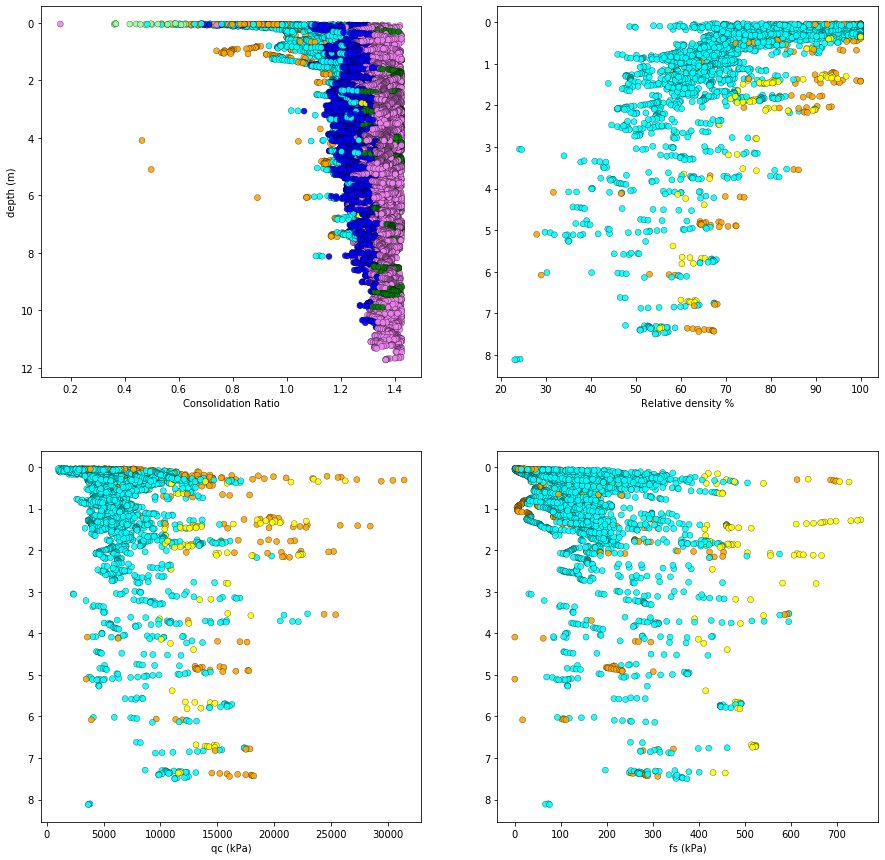

In [64]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


x1=df.consratio
x2=df_sandy.dr 
x3=df_sandy.qc_kPa 
x4=df_sandy.fs_kPa 

zs=df.depth_m
zs_sandy=df_sandy.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}

df_sandy['colors'] = df_sandy['type'].map(lambda x: color_dict[x])
df['colors'] = df['type'].map(lambda x: color_dict[x])

ax.scatter(x1, zs,color=df['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax2.scatter(x2, zs_sandy,color=df_sandy['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax3.scatter(x3, zs_sandy,color=df_sandy['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax4.scatter(x4, zs_sandy,color=df_sandy['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)


ax.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

ax.set_xlabel('Consolidation Ratio'),ax.set_ylabel('depth (m)')
ax2.set_xlabel('Relative density %'),ax.set_ylabel('depth (m)')
ax3.set_xlabel('qc (kPa)'),ax.set_ylabel('depth (m)')
ax4.set_xlabel('fs (kPa)'),ax.set_ylabel('depth (m)')

plt.show()

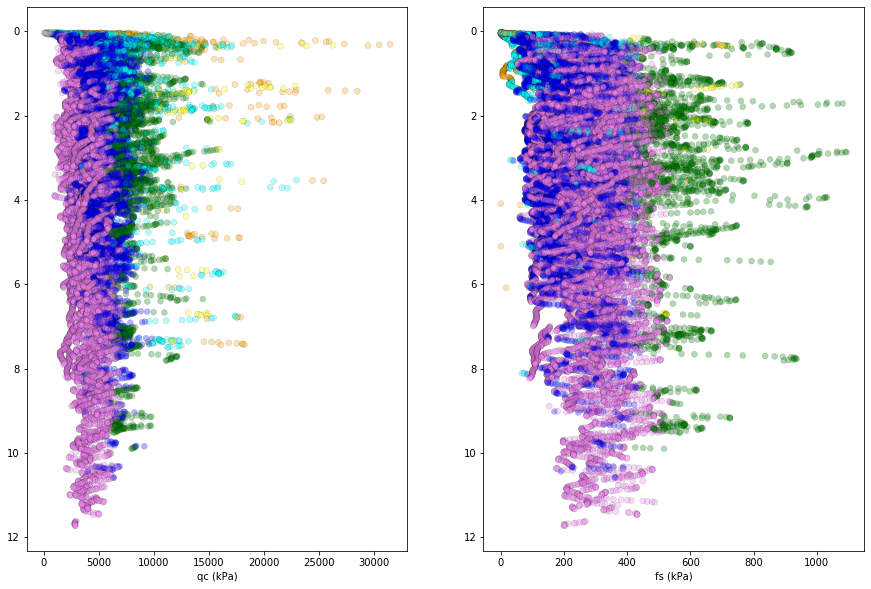

In [69]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))

ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)


x3=df.qc_kPa 
x4=df.fs_kPa 

zs=df.depth_m
zs_sandy=df_sandy.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}

df['colors'] = df['type'].map(lambda x: color_dict[x])

ax3.scatter(x3, zs,color=df['colors'], marker='o',edgecolors='Black',alpha=0.3, linewidths=0.3)
ax4.scatter(x4, zs,color=df['colors'], marker='o',edgecolors='Black',alpha=0.3, linewidths=0.3)

ax3.invert_yaxis()
ax4.invert_yaxis()

ax3.set_xlabel('qc (kPa)'),ax.set_ylabel('depth (m)')
ax4.set_xlabel('fs (kPa)'),ax.set_ylabel('depth (m)')

plt.show()

In [31]:
df_uncons = df[(df.consratio<0.92)].copy()
df_uncons['dr'] = df_uncons.apply(lambda x: _dr(x.qc_kPa,x.sv_kPa), axis=1)
df_uncons.tail()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,dr
39613,0.05,3461.1,7.9,0.95,3460.15,3460.15,0.002283,6,0.798101,Orange,89.880408
39614,0.06,3286.9,15.8,1.14,3285.76,3285.76,0.004809,5,0.888196,Cyan,86.053305
39972,0.04,7634.7,22.4,0.76,7633.94,7633.94,0.002934,6,0.896865,Orange,100.000000
40662,0.05,3825.0,15.2,0.95,3824.05,3824.05,0.003975,6,0.876519,Orange,92.559658
40991,0.05,2923.0,14.0,0.95,2922.05,2922.05,0.004791,5,0.876583,Cyan,85.351852


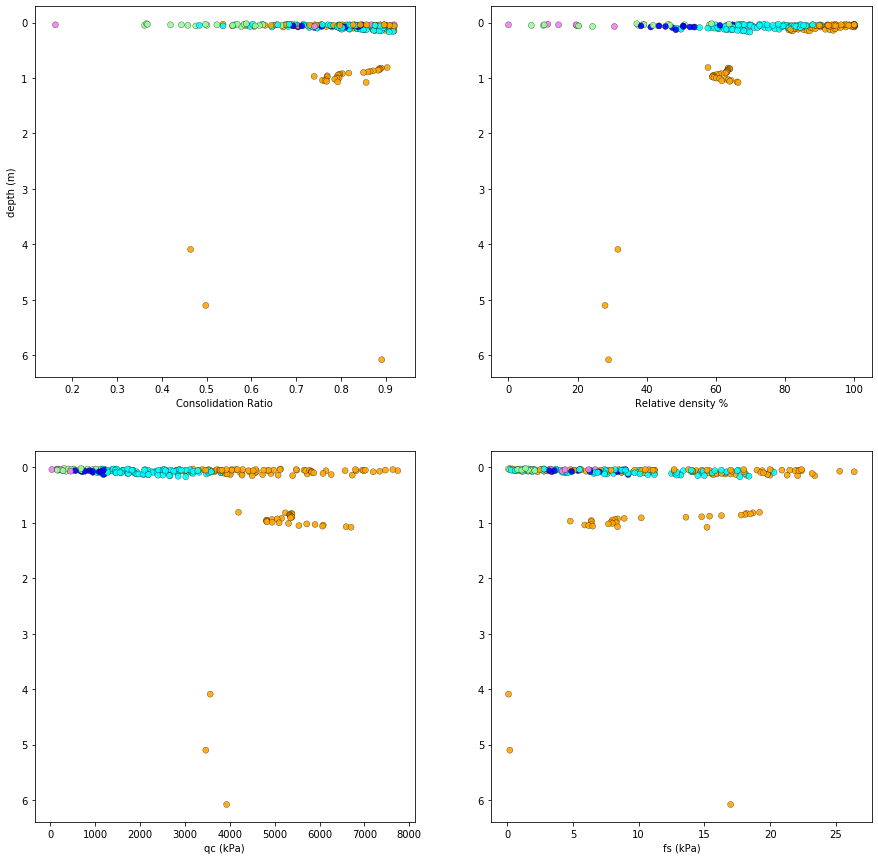

In [35]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


x1=df_uncons.consratio
x2=df_uncons.dr 
x3=df_uncons.qc_kPa 
x4=df_uncons.fs_kPa 

zs=df_uncons.depth_m
zs_sandy=df_uncons.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}

df_uncons['colors'] = df_uncons['type'].map(lambda x: color_dict[x])

ax.scatter(x1, zs,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax2.scatter(x2, zs_sandy,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax3.scatter(x3, zs_sandy,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax4.scatter(x4, zs_sandy,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)


ax.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

ax.set_xlabel('Consolidation Ratio'),ax.set_ylabel('depth (m)')
ax2.set_xlabel('Relative density %'),ax.set_ylabel('depth (m)')
ax3.set_xlabel('qc (kPa)'),ax.set_ylabel('depth (m)')
ax4.set_xlabel('fs (kPa)'),ax.set_ylabel('depth (m)')

plt.show()

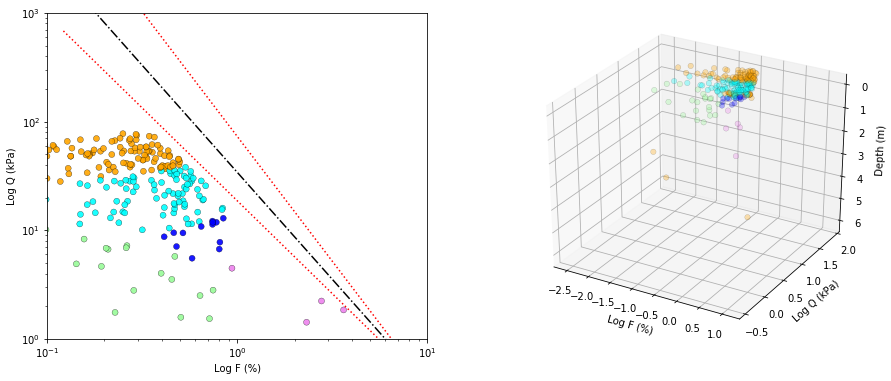

In [36]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

xs=df_uncons.F*100   ### express in %
ys=df_uncons.Q/100   ### express in bar 
zs=df_uncons.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}
df_uncons['colors'] = df_uncons['type'].map(lambda x: color_dict[x])

ax.scatter(np.log10(xs), np.log10(ys), zs, color=df_uncons['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)
ax2.scatter(xs, ys,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
#   volendo aggiungi edgecolors='b'   al grafico

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)') 

x3 = [10.149,0.32]
x4 = [10.149,0.18]
x5 = [10.149,0.12]
y3 = [0.3556,1000]
y4 = [0.3556,1000]
y5 = [0.3556,700]

ax2.plot(x3,y3,':r')
ax2.plot(x4,y4,'-.k')
ax2.plot(x5,y5,':r')

ax.invert_zaxis()

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,10))

plt.show()

In [37]:
df_select = df[((df.consratio<0.92)&(df.depth_m>0.4))].copy()
df_select['dr'] = df_uncons.apply(lambda x: _dr(x.qc_kPa,x.sv_kPa), axis=1)
df_select.iloc[:,:-2]

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio
1321,0.809999,4193.2,19.2,15.389990,4177.810009,4177.810009,0.004596,6,0.903644
1322,0.819999,5238.5,18.7,15.579990,5222.920009,5222.920009,0.003580,6,0.890368
1323,0.830000,5377.9,18.2,15.769991,5362.130010,5362.130010,0.003394,6,0.885913
1324,0.840000,5385.6,18.5,15.959990,5369.640010,5369.640010,0.003445,6,0.887888
1325,0.850000,5331.4,18.1,16.149991,5315.250010,5315.250010,0.003405,6,0.885580
1326,0.860000,5337.7,17.8,16.339990,5321.360010,5321.360010,0.003345,6,0.883461
1327,0.870000,5344.0,16.3,16.529991,5327.470009,5327.470009,0.003060,6,0.872604
1328,0.880000,5358.5,15.4,16.719991,5341.780010,5341.780010,0.002883,6,0.865630
1329,0.889999,5381.7,14.8,16.909989,5364.790011,5364.790011,0.002759,6,0.860717
1330,0.899999,5385.6,13.6,17.099989,5368.500011,5368.500011,0.002533,6,0.850681


In [38]:
# set a filename, run the logistic model, and create the plot

save_folder = 'images/phase-animate_5'
gif_filename = '05-pan-rotate-zoom-demo'

working_folder = '{}/{}'.format(save_folder, gif_filename)

if not os.path.exists(working_folder):
    os.makedirs(working_folder)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

df_select['colors'] = df_select['type'].map(lambda x: color_dict[x])

xs=df_select.F*100   ### express in %
ys=df_select.Q/100   ### express in bar 
zs=df_select.depth_m

# load data

ax.scatter(np.log10(xs), np.log10(ys), zs, 
           color=df_select['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)

ax.invert_zaxis()
ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')

# create 360 frames for the animated gif

for azimuth in range(0, 360):
    ax.view_init(30, azimuth)
    
    # set the figure title to the viewing perspective, and save each figure as a .png
    #fig.suptitle('elev={:.1f}, angle={:.1f}, dist={:.1f}'.format(ax.view_init[0], ax.view_init[1], 50))
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, azimuth))
    
# don't display the static plot...
plt.close()

# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(working_folder))]
gif = images[0]
gif.info['duration'] = 75 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)

In [41]:
df_select['cptname']=xls.iloc[df_select.index.tolist(),:].CPTname

In [216]:
df_select=pd.DataFrame(df_select)
df_select.head()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,dr,cptname
1321,0.809999,4193.2,19.2,15.389990,4177.810009,4177.810009,0.004596,6,0.903644,Orange,57.703588,1100
1322,0.819999,5238.5,18.7,15.579990,5222.920009,5222.920009,0.003580,6,0.890368,Orange,63.504073,1100
1323,0.830000,5377.9,18.2,15.769991,5362.130010,5362.130010,0.003394,6,0.885913,Orange,64.045489,1100
1324,0.840000,5385.6,18.5,15.959990,5369.640010,5369.640010,0.003445,6,0.887888,Orange,63.923352,1100
1325,0.850000,5331.4,18.1,16.149991,5315.250010,5315.250010,0.003405,6,0.885580,Orange,63.493692,1100


In [217]:
namefile = 'df_select.xls'

str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + namefile
export_csv = df_select.to_excel (nomefile, header=True)

In [218]:
df_select.groupby('cptname').mean()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,dr
cptname,,,,,,,,,,
1100,0.944999,5359.857143,11.157143,17.954987,5341.902156,5341.902156,0.002115,6,0.819639,62.138078
1580,5.100022,3465.700000,0.200000,96.900418,3368.799582,3368.799582,0.000059,6,0.498411,27.941310
700-2,6.080044,3929.500000,17.000000,115.520836,3813.979164,3813.979164,0.004457,6,0.891487,28.952045
800-2,4.089999,3563.800000,0.100000,77.709981,3486.090019,3486.090019,0.000029,6,0.464455,31.646753


In [44]:
df_select.groupby("cptname").describe(include='all')

depth_m                                                         \
          count unique top freq      mean      std       min       25%   
cptname                                                                  
1100       28.0    NaN NaN  NaN  0.944999  0.08226  0.809999  0.877499   
1580        1.0    NaN NaN  NaN  5.100022      NaN  5.100022  5.100022   
700-2       1.0    NaN NaN  NaN  6.080044      NaN  6.080044  6.080044   
800-2       1.0    NaN NaN  NaN  4.089999      NaN  4.089999  4.089999   

                             ...     dr                                \
              50%       75%  ... unique top freq       mean       std   
cptname                      ...                                        
1100     0.944999  1.012499  ...    NaN NaN  NaN  62.138078  2.252289   
1580     5.100022  5.100022  ...    NaN NaN  NaN  27.941310       NaN   
700-2    6.080044  6.080044  ...    NaN NaN  NaN  28.952045       NaN   
800-2    4.089999  4.089999  ...    NaN NaN  NaN  31.646753       NaN   

                                                                
               min        25%        50%        75%        max  
cptname                                                         
1100     57.703588  60.112157  62.955053  63.537554  66.415894  
1580     27.941310  27.941310  27.941310  27.941310  27.941310  
700-2    28.952045  28.952045  28.952045  28.952045  28.952045  
800-2    31.646753  31.646753  31.646753  31.646753  31.646753  

[4 rows x 121 columns]

In [45]:
df_select.groupby('cptname').agg({'type':'count','depth_m':'mean', 'qc_kPa':'mean', 'fs_kPa':'mean', 'consratio':'mean'}).rename(columns={'type':'Quantity'})

,Quantity,depth_m,qc_kPa,fs_kPa,consratio
cptname,,,,,
1100,28,0.944999,5359.857143,11.157143,0.819639
1580,1,5.100022,3465.700000,0.200000,0.498411
700-2,1,6.080044,3929.500000,17.000000,0.891487
800-2,1,4.089999,3563.800000,0.100000,0.464455
